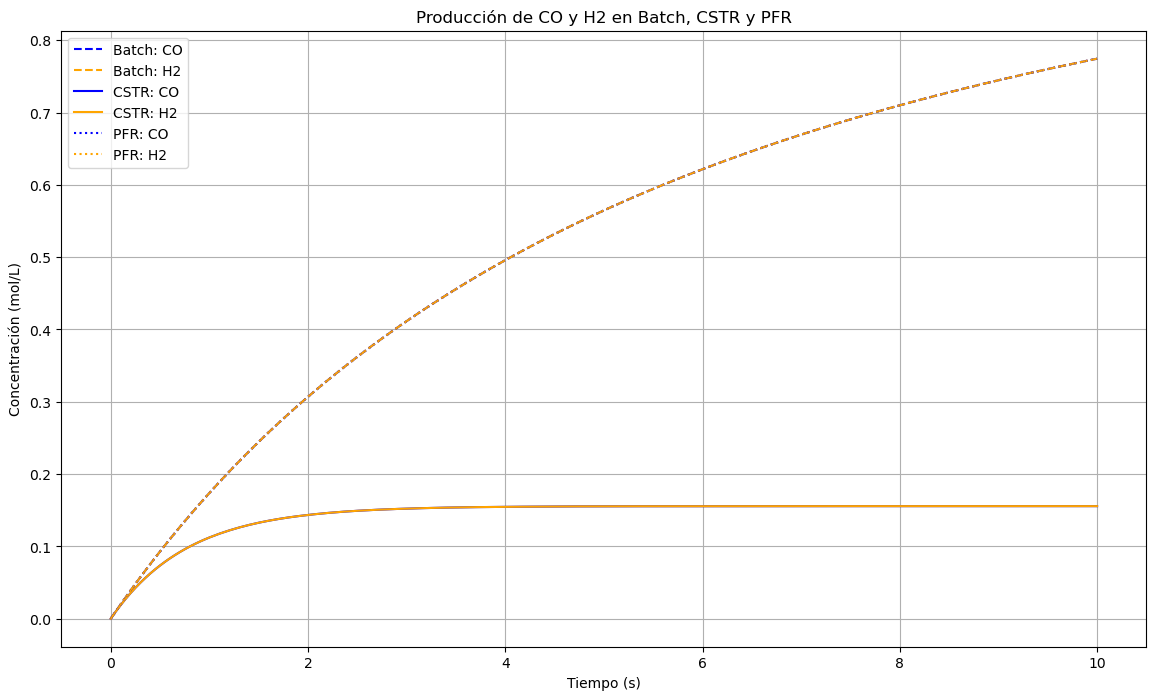

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros del sistema
k = 0.1  # Constante de velocidad (mol/L·s)
CxHyOz_0 = 1.0  # Concentración inicial de biomasa (mol/L)
H2O_0 = 2.0  # Concentración inicial de agua (mol/L)
CO_0 = 0.0  # Concentración inicial de monóxido de carbono (mol/L)
H2_0 = 0.0  # Concentración inicial de hidrógeno (mol/L)
V = 1.0  # Volumen del reactor (L)
F_in = 1.0  # Flujo volumétrico de entrada (L/s)
tau = V / F_in  # Tiempo de residencia (s)
t_span = np.linspace(0, 10, 200)  # Intervalo de tiempo (s)

# Ecuación cinética
def rate(C):
    C_CxHyOz, C_H2O = C
    return k * C_CxHyOz * C_H2O

# Reactor Batch
def batch_ode(t, C):
    C_CxHyOz, C_H2O, C_CO, C_H2 = C
    r = rate([C_CxHyOz, C_H2O])
    return [-r, -r, r, r]

batch_solution = solve_ivp(batch_ode, [0, max(t_span)], [CxHyOz_0, H2O_0, CO_0, H2_0], t_eval=t_span)

# Reactor CSTR
def cstr_ode(t, C):
    C_CxHyOz, C_H2O, C_CO, C_H2 = C
    r = rate([C_CxHyOz, C_H2O])
    return [
        F_in / V * (CxHyOz_0 - C_CxHyOz) - r,
        F_in / V * (H2O_0 - C_H2O) - r,
        F_in / V * (CO_0 - C_CO) + r,
        F_in / V * (H2_0 - C_H2) + r,
    ]

CSTR_solution = solve_ivp(cstr_ode, [0, max(t_span)], [CxHyOz_0, H2O_0, CO_0, H2_0], t_eval=t_span)

# Reactor PFR
def pfr_ode(t, C):
    C_CxHyOz, C_H2O, C_CO, C_H2 = C
    r = rate([C_CxHyOz, C_H2O])
    return [-r / F_in, -r / F_in, r / F_in, r / F_in]

PFR_solution = solve_ivp(pfr_ode, [0, max(t_span)], [CxHyOz_0, H2O_0, CO_0, H2_0], t_eval=t_span)

# Gráficos
plt.figure(figsize=(14, 8))

# Batch
plt.plot(t_span, batch_solution.y[2], label='Batch: CO', linestyle='dashed', color='blue')
plt.plot(t_span, batch_solution.y[3], label='Batch: H2', linestyle='dashed', color='orange')

# CSTR
plt.plot(CSTR_solution.t, CSTR_solution.y[2], label='CSTR: CO', linestyle='solid', color='blue')
plt.plot(CSTR_solution.t, CSTR_solution.y[3], label='CSTR: H2', linestyle='solid', color='orange')

# PFR
plt.plot(PFR_solution.t, PFR_solution.y[2], label='PFR: CO', linestyle='dotted', color='blue')
plt.plot(PFR_solution.t, PFR_solution.y[3], label='PFR: H2', linestyle='dotted', color='orange')

# Configuración del gráfico
plt.xlabel('Tiempo (s)')
plt.ylabel('Concentración (mol/L)')
plt.title('Producción de CO y H2 en Batch, CSTR y PFR')
plt.legend()
plt.grid()
plt.show()
